In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout # Dropout:임의의 노드 제거
#from IPython.display import Image

In [8]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

x_train=x_train.reshape(-1,28,28,1) #(데이터 수, 행, 열, 색상 종류), 데이터 수가 -1이면 원래 데이터 개수 그대로 가져옴
x_test=x_test.reshape(-1,28,28,1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train=x_train.astype(np.float32) /255.0 #0~1 정규화
x_test=x_test.astype(np.float32) /255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [16]:
cnn=Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))  # kernel_size=filter size
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# Optimizers : SGD, Adam, RMSprop
- Optimizer는 딥러닝에서 Network가 빠르고 정확하게 학습하는 것을 목표로 함(optimizer:손실함수가 최소인 값을 찾는 것)
- 주로 Gradient Descent Algorithm을 기반으로 한 SGD에서 변형된 여러 종류의 Optimizer가 사용되고 있다
https://onevision.tistory.com/category/Algorithm/Deep%20Learning

In [22]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [23]:
hist=cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))
# 468.75=60000/128, batch_size:전체 데이터를 batch_size 만큼 나누어 그 결과만큼 진행한 후, w,b 업데이트

Epoch 1/30
469/469 [==============================] - 54s 113ms/step - loss: 0.5277 - accuracy: 0.8146 - val_loss: 0.3362 - val_accuracy: 0.8821
Epoch 2/30
469/469 [==============================] - 53s 112ms/step - loss: 0.3406 - accuracy: 0.8784 - val_loss: 0.2832 - val_accuracy: 0.8952
Epoch 3/30
469/469 [==============================] - 52s 111ms/step - loss: 0.2890 - accuracy: 0.8959 - val_loss: 0.2603 - val_accuracy: 0.9022
Epoch 4/30
469/469 [==============================] - 51s 108ms/step - loss: 0.2584 - accuracy: 0.9072 - val_loss: 0.2390 - val_accuracy: 0.9120
Epoch 5/30
469/469 [==============================] - 52s 110ms/step - loss: 0.2316 - accuracy: 0.9152 - val_loss: 0.2295 - val_accuracy: 0.9163
Epoch 6/30
469/469 [==============================] - 52s 110ms/step - loss: 0.2157 - accuracy: 0.9200 - val_loss: 0.2260 - val_accuracy: 0.9189
Epoch 7/30
469/469 [==============================] - 54s 114ms/step - loss: 0.2002 - accuracy: 0.9260 - val_loss: 0.2168 - val_ac

In [24]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2852 - accuracy: 0.9296


[0.28518643975257874, 0.9296000003814697]

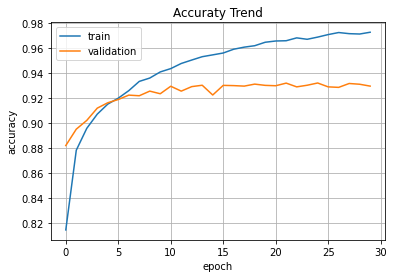

In [26]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuraty Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

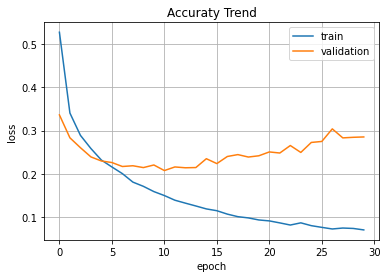

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Accuraty Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()